# Factors affecting number of rides
## by Prashant Kumar

## Investigation Overview

In this investigation, I wanted to look at the factors that affect the numbere of rides. The main focus was on the teh user_type,gender,age,station location.


## Dataset Overview

There are 210563 trips in the dataset with 16 features(duration_sec,start_time, end_time, start_station_id,start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id,user_type, member_birth_year, member_gender,bike_share_for_all_trip.The datatypes for diffrent columns are int,float or object.Most the columns does not contain any null value except for member birth year and member_gender.

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201908-baywheels-tripdata.csv')

In [6]:
#Making a copy of the data
df_cleaned = df.copy()
#Changing the start_timeand end_time to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)
#Changing the bike_id, start_station_id, and end_station_id to str
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)
#Changing the user_type and member_gender to category format
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.member_gender = df_cleaned.member_gender.astype('category')

In [7]:
#Filter data to include reasonable member age range
df_cleaned['member_age'] = 2019-df_cleaned['member_birth_year']

## Distribution of age of the users
.Maximum peole taking ride are around 18 to 30 years of age.People above 60 years of age are taking rides very rarely**
One thing is interesting to see is that people of age around 20 years of age are taking comparatively less rides.

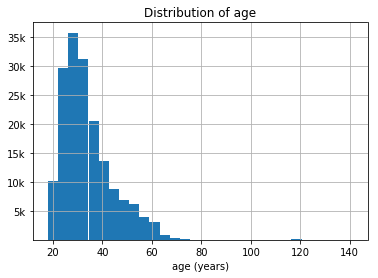

In [11]:
plt.title('Distribution of age')
df_cleaned['member_age'].hist(bins=30);
plt.xlabel('age (years)');
plt.yticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3,35e3], ['5k', '10k', '15k', '20k', '25k', '30k','35k']);

 ## Approx. duration for the trips ?
we can conclude that maximum trips on an average have a duration of around 450 to 550.Long duration trips are very rear.People prefer rental bikes only for short distances.

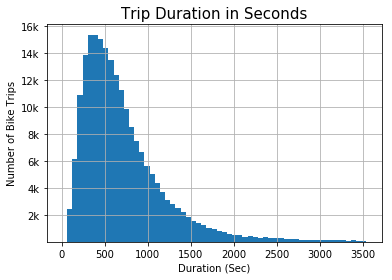

In [13]:
# Duration of the bike rides(seconds)
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df_cleaned, x = 'duration_sec', bins = bin_edges);

plt.title("Trip Duration in Seconds", y=1, fontsize=15)
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');
plt.yticks([2e3, 4e3, 6e3, 8e3, 10e3, 12e3,14e3,16e3], ['2k', '4k', '6k', '8k', '10k', '12k','14k','16k']);
plt.grid()

### Day of the week vs Number of rides 
We can see that the number of rides on first three days of the week are almost equal but on thusday and fri we have maximum trips.On the other hand on saturdays and sundays there is huge decline in the number of rides.

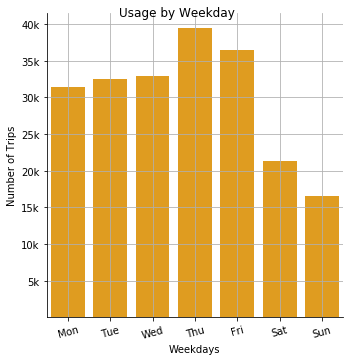

In [23]:
# Weekday usage of the bike system
df_cleaned['weekday'] = df_cleaned['start_time'].dt.strftime('%a')
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plot = sns.catplot(data=df_cleaned, x='weekday', kind='count', order = weekday,color='orange');
plot.fig.suptitle('Usage by Weekday');
plot.set_xticklabels(rotation=15);
plot.set_axis_labels('Weekdays', 'Number of Trips');
plt.yticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3,35e3,40e3], ['5k', '10k', '15k', '20k', '25k', '30k','35k','40k']);
plt.grid()

### Ratio of users of different gender
There ration of male is way more than other two genders.The male ratio is around 0.6 then comes female with around 0.2.The ratio of others is very less as comp

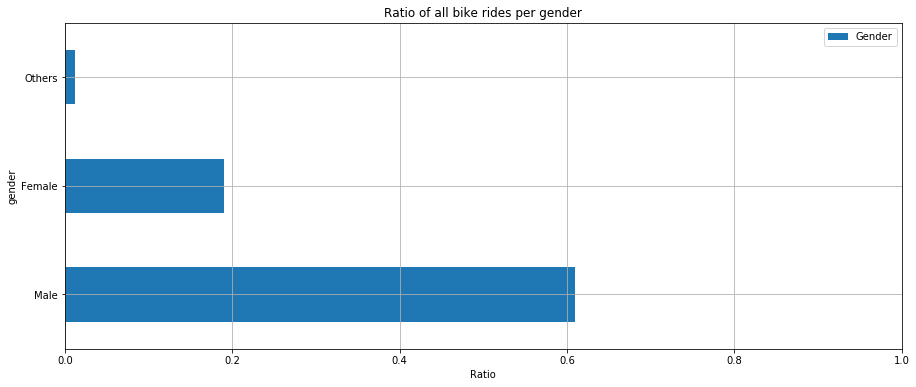

In [19]:
male_ratio=df_cleaned.query('member_gender=="Male"').count()/df_cleaned.shape[0]
female_ratio=df_cleaned.query('member_gender=="Female"').count()/df_cleaned.shape[0]
other_ratio=df_cleaned.query('member_gender=="Other"').count()/df_cleaned.shape[0]
#female_ratio=df_cleaned.query('member_gender=="Other"').count()/df_cleaned.shape[0]

per_list=[male_ratio[0],female_ratio[0],other_ratio[0]]
temp=pd.DataFrame(per_list) 
temp['gender']=['Male','Female','Others']
temp.set_index("gender", inplace = True)
temp.rename(columns={0:'Gender'}, inplace=True)
temp.plot(kind='barh',figsize=(15,6))
plt.title('Ratio of all bike rides per gender')
plt.xlabel('Ratio')
plt.xlim(0,1)
plt.grid()


## Trips based on user_type ?
I extended my investigation of number of trips against user_type and day of the week.After the observation I could see that out of subscribers the maximum number of trips are taken on thursdays while among the consumers the maximum number of trips are taken on saturdays.I also made investigation of number of trips against gender and day of week.Here,I could see all the male ,females and others are taking maximum rides on thursday.

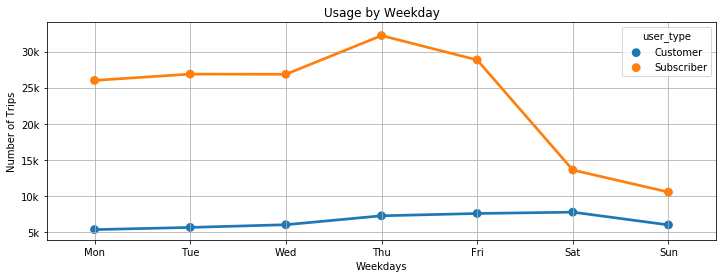

In [24]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=[ 12, 4]);

df_cleaned_user_week = df_cleaned.groupby(['weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=df_cleaned_user_week, x='weekday', y=0, hue = 'user_type', order = weekday);

plt.title('Usage by Weekday');
plt.xlabel('Weekdays')
plt.ylabel('Number of Trips');
plt.yticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3], ['5k', '10k', '15k', '20k', '25k', '30k']);

plt.grid()